# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [352]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Mall_Customers.csv')
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [353]:
missing_per_column = df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)


Количество пустых значений по каждому столбцу:
CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


In [354]:
duplicates_count = df.duplicated().sum()
print(f'Количество дублирующихся строк: {duplicates_count}')

Количество дублирующихся строк: 0


In [355]:
unique_count = df['CustomerID'].nunique()
print(f'Количество уникальных значений в столбце "CustomerID  ": {unique_count}')

Количество уникальных значений в столбце "CustomerID  ": 200


Исследуем пол покупателей

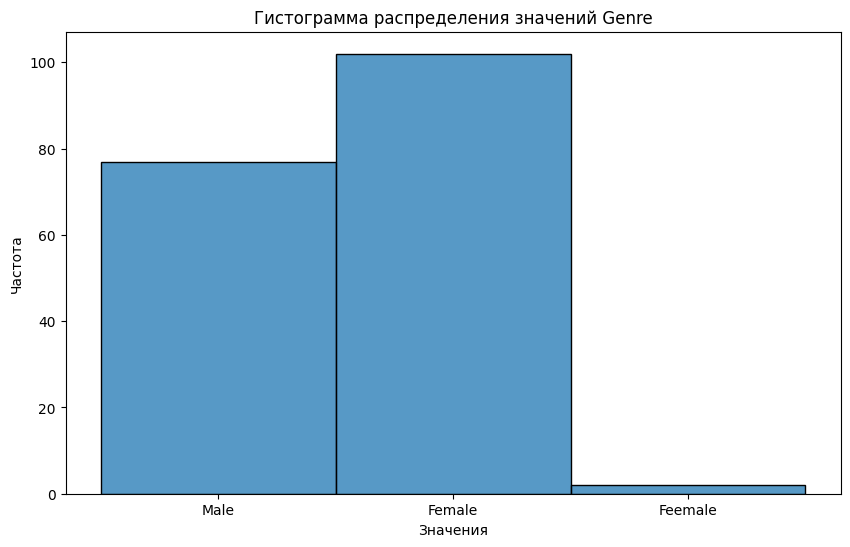

In [356]:
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(df['Genre'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Genre')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [357]:
# Замена значений в столбце 'Genre'

df['Genre'] = df['Genre'].replace({'Feemale': 'Female'})


Исследование возраста

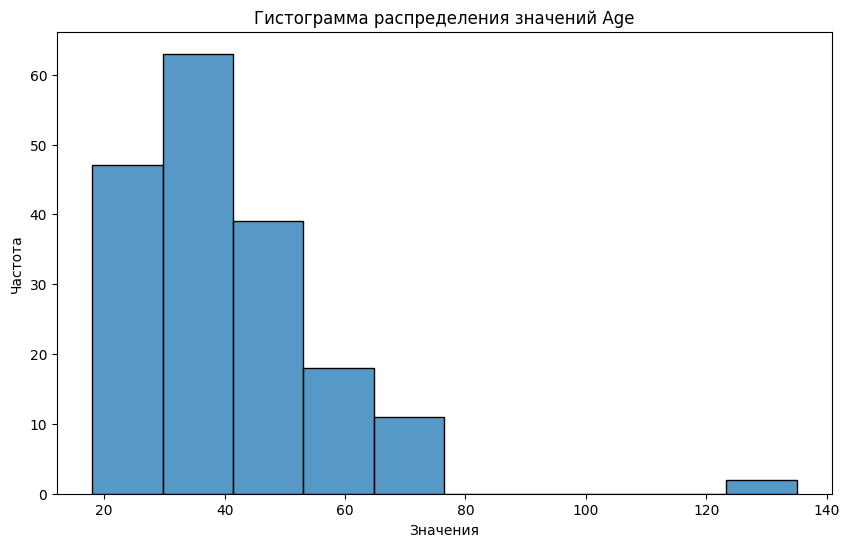

In [358]:
# Визуализация возраста

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

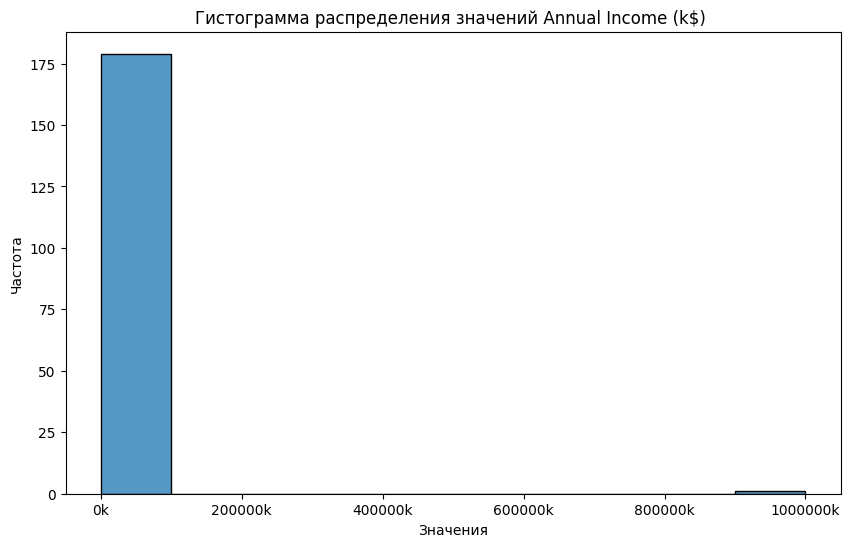

In [359]:
from matplotlib.ticker import FuncFormatter
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Annual Income (k$) ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [360]:
unique_count = df['Annual Income (k$)'].nunique()
print(f'Количество уникальных значений в столбце "CustomerID  ": {unique_count}')

Количество уникальных значений в столбце "CustomerID  ": 64


Очередь Spending Score (1-100)

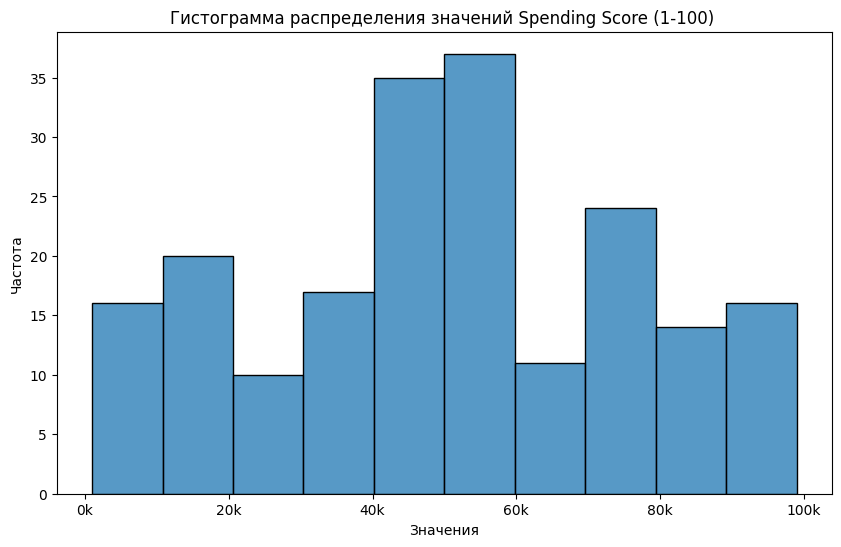

In [361]:
from matplotlib.ticker import FuncFormatter
# Визуализация гистограммы Spending Score (1-100)

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=10)
plt.title('Гистограмма распределения значений Spending Score (1-100) ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [362]:
# Фильтрация строк, где Age равно NaN
nan_ge_rows = df[df['Genre'].isna()]
# Вывод результатов

print(nan_ge_rows)

     CustomerID Genre    Age  Annual Income (k$)  Spending Score (1-100)
6             7   NaN  135.0                18.0                       6
32           33   NaN   53.0                33.0                       4
50           51   NaN   49.0                42.0                      52
51           52   NaN   33.0                42.0                      60
54           55   NaN   50.0                 NaN                      45
56           57   NaN   51.0                44.0                      50
57           58   NaN   69.0                44.0                      46
84           85   NaN   21.0                54.0                      57
95           96   NaN   24.0                60.0                      52
106         107   NaN    NaN                63.0                      50
110         111   NaN   65.0                63.0                      52
123         124   NaN   39.0                 NaN                      91
129         130   NaN   38.0                71.0   

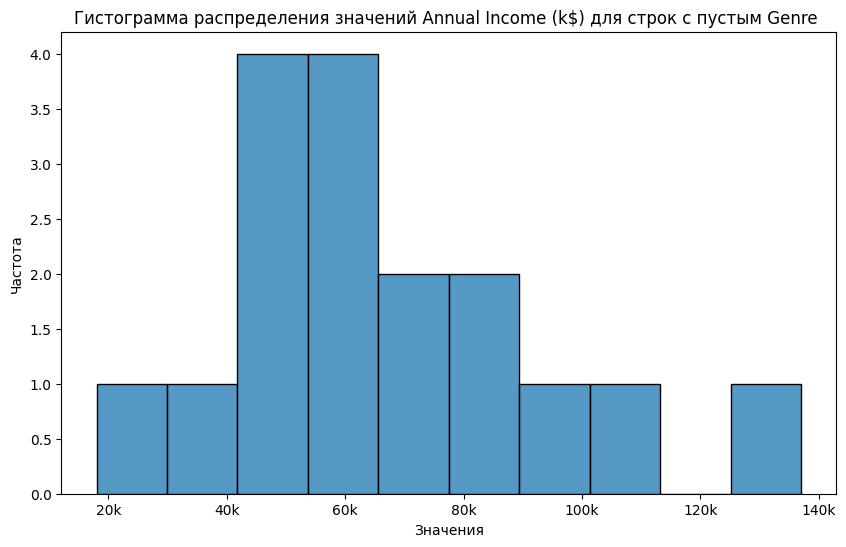

In [363]:
from matplotlib.ticker import FuncFormatter
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(nan_ge_rows['Annual Income (k$)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Annual Income (k$) для строк с пустым Genre ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

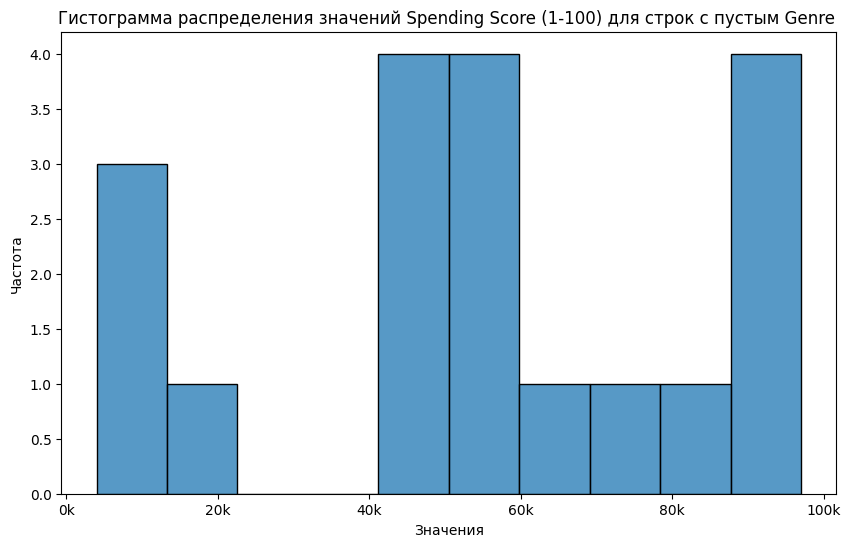

In [364]:
# Визуализация гистограммы

plt.figure(figsize=(10, 6))
sns.histplot(nan_ge_rows['Spending Score (1-100)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Spending Score (1-100) для строк с пустым Genre ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [365]:
# Фильтрация строк, где Age равно NaN
nan_age_rows = df[df['Age'].isna()]
# Вывод результатов

print(nan_age_rows)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
1             2    Male  NaN                 NaN                      81
2             3  Female  NaN                16.0                       6
10           11    Male  NaN                19.0                      14
23           24    Male  NaN                25.0                      73
35           36  Female  NaN                33.0                      81
36           37  Female  NaN                34.0                      17
38           39  Female  NaN                37.0                      26
45           46  Female  NaN                39.0                      65
46           47  Female  NaN                 NaN                      55
68           69    Male  NaN                48.0                      59
70           71    Male  NaN                49.0                      55
88           89  Female  NaN                58.0                      60
89           90  Female  NaN                58.0   

In [366]:
# Фильтрация строк, где Annual Income (k$) равно NaN
nan_AI_rows = df[df['Annual Income (k$)'].isna()]
# Вывод результатов

print(nan_AI_rows)

     CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
1             2    Male   NaN                 NaN                      81
27           28    Male  35.0                 NaN                      61
31           32  Female  21.0                 NaN                      73
39           40  Female  20.0                 NaN                      75
46           47  Female   NaN                 NaN                      55
48           49  Female  29.0                 NaN                      42
54           55     NaN  50.0                 NaN                      45
66           67  Female  43.0                 NaN                      50
75           76    Male  26.0                 NaN                      54
104         105    Male  49.0                 NaN                      56
123         124     NaN  39.0                 NaN                      91
128         129    Male  59.0                 NaN                      11
130         131    Male  47.0         

Резюмирую:
1. В датасете присутствуют пропуски 3 признаках: Age, Annual Income (k$) и Genre, их нужно устранить.
2. Пропуски допущены в разных строчках, их нельзя удалить все разом.
3. Опечатка в Genre - устранена.
4. Имеются выбросы по признакам Age и Annual Income (k$) - я думаю от строчек с выбросом можно просто избавиться, хотя в случае с возрастом, возможно допущена опечатка, от него можно просто отнять 100 лет.


### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [367]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

# Вывод размеров полученных наборов

print(f'Размер обучающего набора: {train_df.shape}')

print(f'Размер тестового набора: {test_df.shape}')


Размер обучающего набора: (160, 5)
Размер тестового набора: (40, 5)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [368]:
missing_per_column = train_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)



Количество пустых значений по каждому столбцу:
CustomerID                 0
Genre                     15
Age                       15
Annual Income (k$)        18
Spending Score (1-100)     0
dtype: int64


Сделаем умную замену: 
1. сначала заменим пропуски в признаке Genre, заменив Nan на случайный гендер, с сохренением пропорций в непустых строках. Я утверждаю, что такая замена приемлема, так как ранее я изучил распределение значений Spending Score (1-100) и Annual Income (k$)   для пустых Genre и увидел что данные в этих строчках распределены равномерно, без сильного смещения мат. ожидания от среднего.
2. Проверим признак Age на наличие выбросов, если они есть - изменим age, отняв от него 100 (возможно это просто опечатка), полученный в результате преобразований возраст будет соответствовать самому частому возрасту в выборке.
3. Затем заполним пропуски в Age, заменив Nan на среднее значение выборки по каждому полу (Genre)
4. Затем проверим на наличие выбросов в Annual Income (k$), если выброс попадает в датафрейм, поделим значение на 10000, возмодно была допущена ошибка - не учтены ед. изм (тыс. $)
5. Заполним пропуски Annual Income (k$) значением, равным моде по возрасту и полу (Age, Genre)

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              160 non-null    int64  
 1   Genre                   160 non-null    object 
 2   Age                     145 non-null    float64
 3   Annual Income (k$)      142 non-null    float64
 4   Spending Score (1-100)  160 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.5+ KB


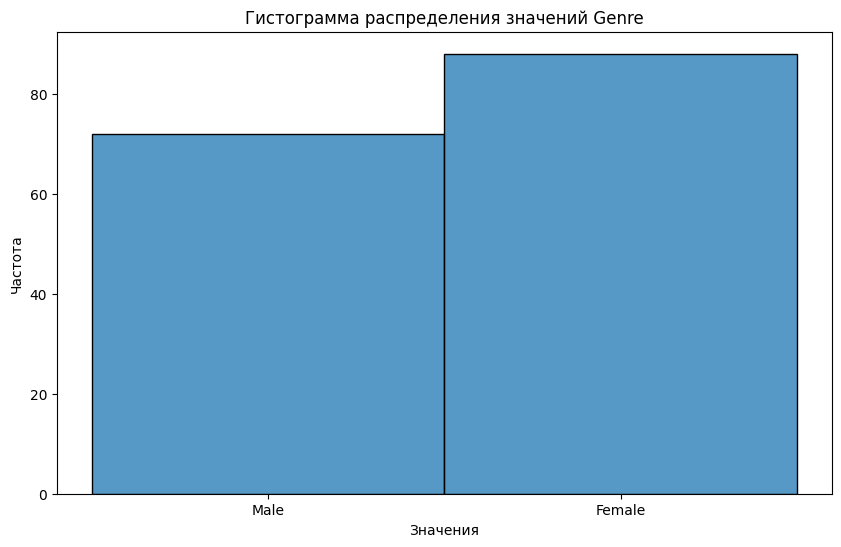

In [369]:
genre_counts = train_df['Genre'].value_counts(normalize=True)

# Генерация случайных значений на основе пропорций
num_missing = train_df['Genre'].isna().sum()
random_genres = np.random.choice(genre_counts.index, size=num_missing, p=genre_counts.values)

# Замена пропусков на случайные значения
train_df.loc[train_df['Genre'].isna(), 'Genre'] = random_genres
train_df.info()
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Genre'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Genre')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


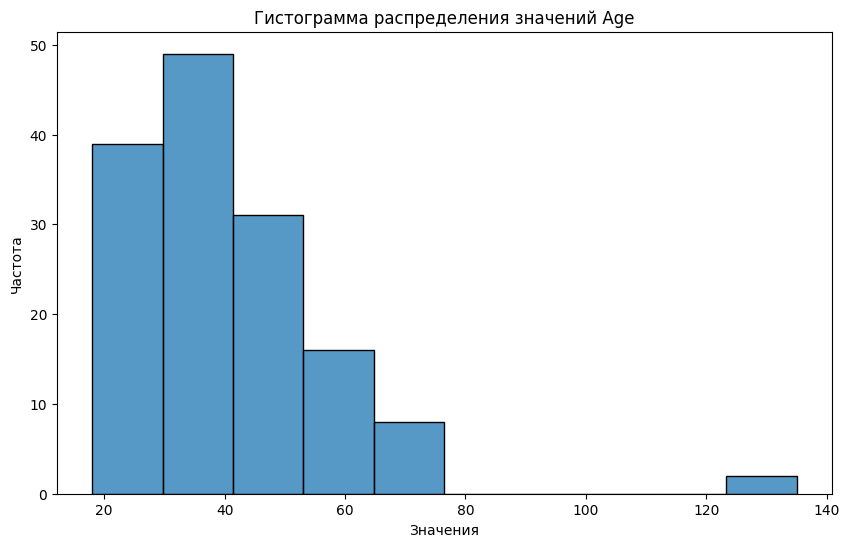

In [370]:
# Визуализация возраста в обучающем датасете

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [371]:
age_above_100 = train_df[train_df['Age'] > 100]


# Вывод результатов

print(age_above_100)

   CustomerID   Genre    Age  Annual Income (k$)  Spending Score (1-100)
6           7  Female  135.0                18.0                       6
8           9    Male  135.0                19.0                       3


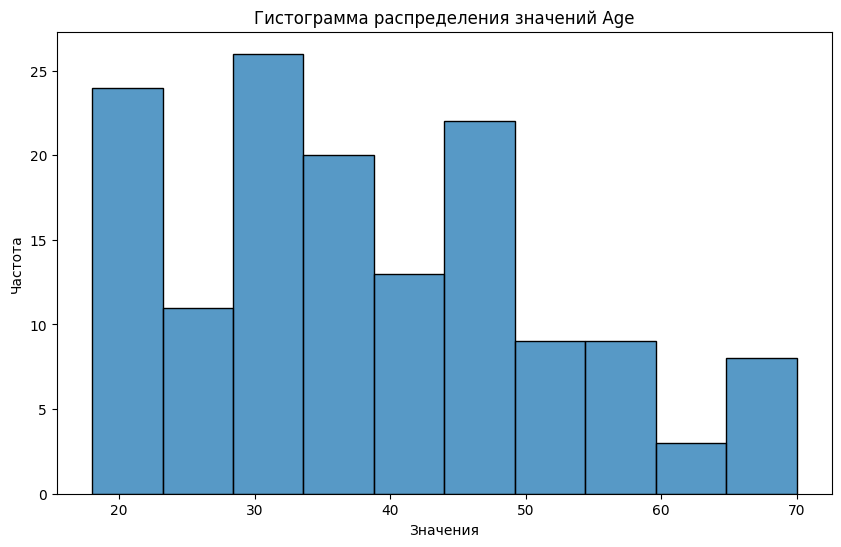

In [372]:
train_df.loc[train_df['Age'] > 100, 'Age'] -= 100
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()


А теперь заполним пропуски в Age

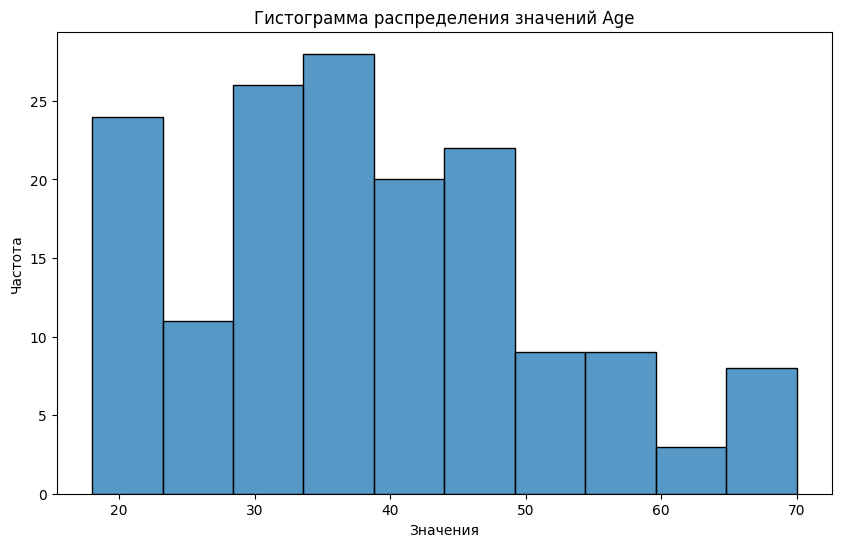

In [373]:
# Вычисление среднего значения для каждого Genre и замена NaN в Age

train_df['Age'] = train_df.groupby('Genre')['Age'].transform(lambda x: x.fillna(x.mean()))
train_df.loc[train_df['Age'] > 100, 'Age'] -= 100
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [374]:
missing_per_column = train_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)


Количество пустых значений по каждому столбцу:
CustomerID                 0
Genre                      0
Age                        0
Annual Income (k$)        18
Spending Score (1-100)     0
dtype: int64


Работа с выбросами Annual Income (k$)

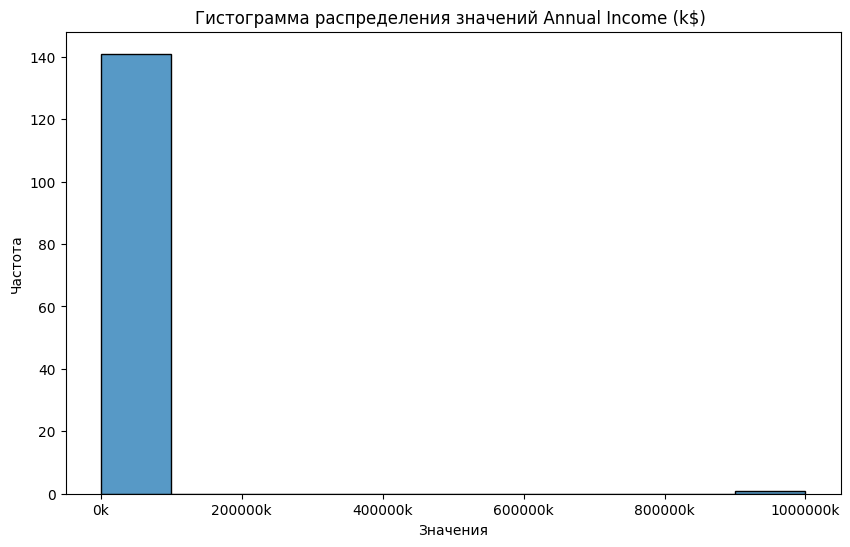

In [375]:
# Визуализация гистограммы Annual Income (k$) для обучающего датасета

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Annual Income (k$)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Annual Income (k$) ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [376]:
# 1. Делим значения 'Annual Income (k$)' больше 800000000 на 1000
train_df.loc[train_df['Annual Income (k$)'] > 800000, 'Annual Income (k$)'] /= 10000


# 2. Заполняем пропуски средним значением по 'Genre' и 'Age'

def fill_missing_income(row):
    if pd.isna(row['Annual Income (k$)']):
        # Находим среднее значение по 'Genre' и 'Age'
        genre = row['Genre']
        age_group = row['Age'] // 10 * 10  # округляем до ближайшего десятка
        mean_income = train_df[(train_df['Genre'] == genre) & (train_df['Age'] // 10 * 10 == age_group)]['Annual Income (k$)'].mean()
        return mean_income
    return row['Annual Income (k$)']
train_df['Annual Income (k$)'] = train_df.apply(fill_missing_income, axis=1)
print(train_df)

     CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
108         109    Male  68.0                63.0                      43
107         108    Male  54.0                63.0                      46
189         190  Female  36.0               103.0                      85
14           15    Male  37.0                20.0                      13
56           57  Female  51.0                44.0                      50
..          ...     ...   ...                 ...                     ...
133         134  Female  31.0                72.0                      71
137         138    Male  32.0                73.0                      73
72           73  Female  60.0                50.0                      49
140         141  Female  57.0                75.0                       5
37           38  Female  30.0                34.0                      73

[160 rows x 5 columns]


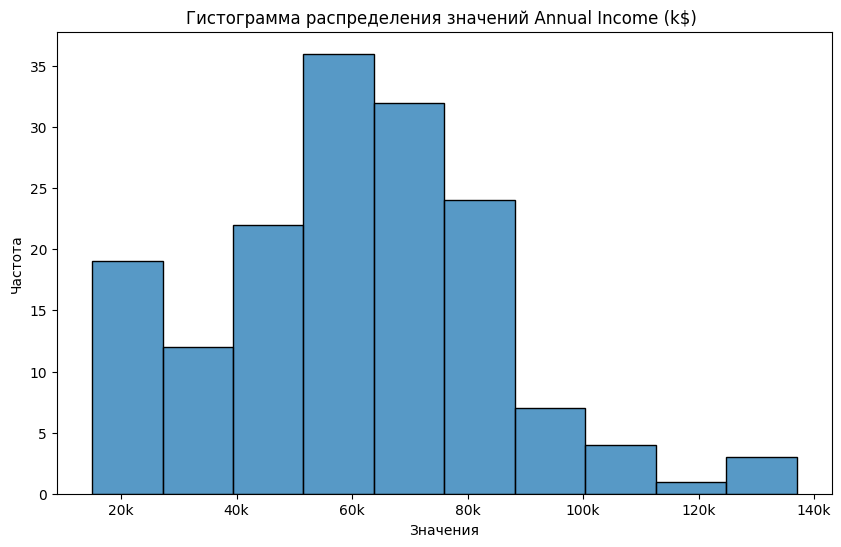

In [377]:
# Визуализация гистограммы Annual Income (k$) для обучающего датасета

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Annual Income (k$)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Annual Income (k$) ')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

In [378]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              160 non-null    int64  
 1   Genre                   160 non-null    object 
 2   Age                     160 non-null    float64
 3   Annual Income (k$)      160 non-null    float64
 4   Spending Score (1-100)  160 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.5+ KB


In [379]:
missing_per_column = train_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)

Количество пустых значений по каждому столбцу:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


Сделано выше

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


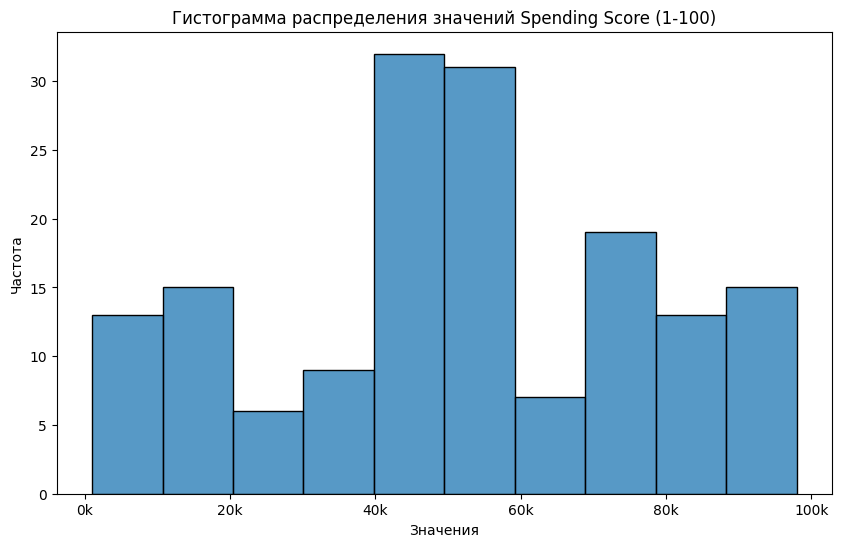

In [380]:
# Визуализация гистограммы Spending Score (1-100) для обучающего датасета

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Spending Score (1-100)'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Spending Score (1-100)')
plt.xlabel('Значения')
plt.ylabel('Частота')

# Форматирование оси X

formatter = FuncFormatter(lambda x, _: f'{int(x)}k')  # Форматирование в тыс. единиц

plt.gca().xaxis.set_major_formatter(formatter)


plt.show()

Распределение числовых данных в целом похоже на нормальное, как по 'Age', 'Spending Score (1-100)', 'Annual Income (k$)', поэтому можно использовать Z-распределение. К тому же выбросы были устранены.

In [381]:
def z_normalize(column):

    return (column - column.mean()) / column.std()

# Нормализация указанных столбцов
train_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = train_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].apply(z_normalize)
print("Нормализованный DataFrame:")
print(train_df)


Нормализованный DataFrame:
     CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
108         109    Male  2.278884            0.118957               -0.320298
107         108    Male  1.199132            0.118957               -0.205307
189         190  Female -0.189120            1.778699                1.289579
14           15    Male -0.111995           -1.665265               -1.470211
56           57  Female  0.967757           -0.669420               -0.051986
..          ...     ...       ...                 ...                     ...
133         134  Female -0.574745            0.492399                0.752953
137         138    Male -0.497620            0.533893                0.829614
72           73  Female  1.661883           -0.420459               -0.090316
140         141  Female  1.430508            0.616880               -1.776854
37           38  Female -0.651870           -1.084356                0.829614

[160 rows x 5 columns]


### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

категориальный признак у нас Genre, имеющий только 2 значения, не являющимися порядковыми, значит подходит One-Hot Encoding


In [382]:
# Применение One-Hot Encoding

train_df = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

print("DataFrame с One-Hot Encoding:")

print(train_df)


DataFrame с One-Hot Encoding:
     CustomerID   Age  Annual Income (k$)  Spending Score (1-100)  \
0             1  19.0                15.0                      39   
1             2   NaN                 NaN                      81   
2             3   NaN                16.0                       6   
3             4  23.0                16.0                      77   
4             5  31.0                17.0                      40   
..          ...   ...                 ...                     ...   
195         196  35.0               120.0                      79   
196         197  45.0               126.0                      28   
197         198  32.0               126.0                      74   
198         199   NaN               137.0                      18   
199         200  30.0               137.0                      83   

     Genre_Female  Genre_Male  
0           False        True  
1           False        True  
2            True       False  
3            

In [383]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Age                     180 non-null    float64
 2   Annual Income (k$)      180 non-null    float64
 3   Spending Score (1-100)  200 non-null    int64  
 4   Genre_Female            200 non-null    bool   
 5   Genre_Male              200 non-null    bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 6.8 KB


In [384]:
train_df['Genre_Male'] = train_df['Genre_Male'].astype(int)

train_df['Genre_Female'] = train_df['Genre_Female'].astype(int)


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [385]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              40 non-null     int64  
 1   Genre                   36 non-null     object 
 2   Age                     35 non-null     float64
 3   Annual Income (k$)      38 non-null     float64
 4   Spending Score (1-100)  40 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB


In [386]:
missing_per_column = test_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)

Количество пустых значений по каждому столбцу:
CustomerID                0
Genre                     4
Age                       5
Annual Income (k$)        2
Spending Score (1-100)    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              40 non-null     int64  
 1   Genre                   40 non-null     object 
 2   Age                     35 non-null     float64
 3   Annual Income (k$)      38 non-null     float64
 4   Spending Score (1-100)  40 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB


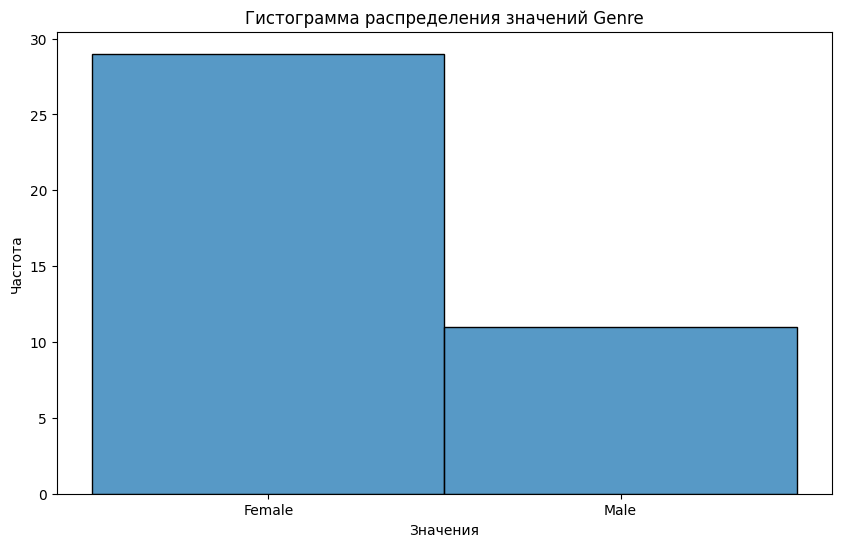

In [387]:
genre_counts = test_df['Genre'].value_counts(normalize=True)

# Генерация случайных значений на основе пропорций
num_missing = test_df['Genre'].isna().sum()
random_genres = np.random.choice(genre_counts.index, size=num_missing, p=genre_counts.values)

# Замена пропусков на случайные значения
test_df.loc[test_df['Genre'].isna(), 'Genre'] = random_genres
test_df.info()
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Genre'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Genre')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

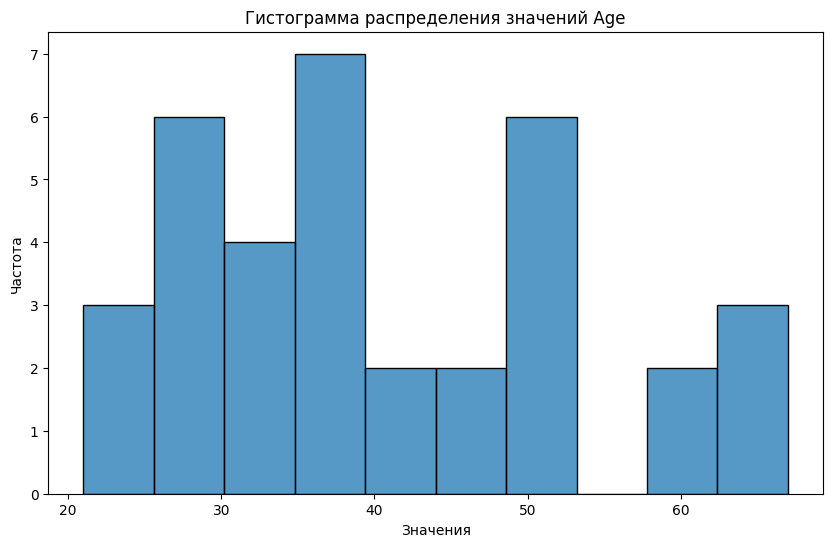

In [388]:
# Визуализация возраста в обучающем датасете

plt.figure(figsize=(10, 6))
sns.histplot(test_df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [389]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              40 non-null     int64  
 1   Genre                   40 non-null     object 
 2   Age                     35 non-null     float64
 3   Annual Income (k$)      38 non-null     float64
 4   Spending Score (1-100)  40 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB


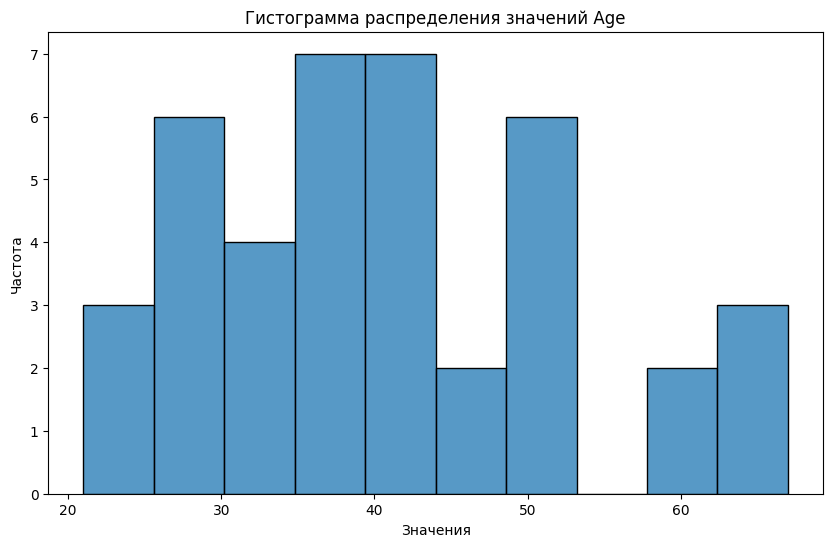

In [390]:
# Вычисление среднего значения для каждого Genre и замена NaN в Age

test_df['Age'] = test_df.groupby('Genre')['Age'].transform(lambda x: x.fillna(x.mean()))
test_df.loc[test_df['Age'] > 100, 'Age'] -= 100
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Age'], bins=10)  # kde=True добавляет кривую плотности
plt.title('Гистограмма распределения значений Age')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

In [392]:
test_df = pd.get_dummies(test_df, columns=['Genre'], prefix='Genre')
test_df['Genre_Male'] = test_df['Genre_Male'].astype(int)
test_df['Genre_Female'] = test_df['Genre_Female'].astype(int)
test_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              40 non-null     int64  
 1   Age                     40 non-null     float64
 2   Annual Income (k$)      38 non-null     float64
 3   Spending Score (1-100)  40 non-null     int64  
 4   Genre_Female            40 non-null     int64  
 5   Genre_Male              40 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.2 KB


In [394]:
missing_per_column = test_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)

Количество пустых значений по каждому столбцу:
CustomerID                0
Age                       0
Annual Income (k$)        2
Spending Score (1-100)    0
Genre_Female              0
Genre_Male                0
dtype: int64


In [396]:

# Вычисление средних значений 'Annual Income (k$)' в зависимости от Genre_Female и Genre_Male

mean_income = test_df.groupby(['Genre_Female', 'Genre_Male'])['Annual Income (k$)'].transform('mean')


# Заполнение пропусков средними значениями

test_df['Annual Income (k$)'] = test_df['Annual Income (k$)'].fillna(mean_income)


print("DataFrame после заполнения пропусков:")

print(test_df)

DataFrame после заполнения пропусков:
     CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
58           59  27.000000           46.000000                      51   
40           41  65.000000           38.000000                      35   
34           35  49.000000           33.000000                      14   
102         103  67.000000           62.000000                      59   
184         185  41.000000           99.000000                      39   
198         199  42.222222          137.000000                      18   
95           96  24.000000           60.000000                      52   
4             5  31.000000           17.000000                      40   
29           30  23.000000           29.000000                      87   
168         169  36.000000           87.000000                      27   
171         172  28.000000           87.000000                      75   
18           19  52.000000           23.000000                      29   


In [397]:
missing_per_column = test_df.isnull().sum()

print("Количество пустых значений по каждому столбцу:")

print(missing_per_column)

Количество пустых значений по каждому столбцу:
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Genre_Female              0
Genre_Male                0
dtype: int64


In [398]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 58 to 172
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              40 non-null     int64  
 1   Age                     40 non-null     float64
 2   Annual Income (k$)      40 non-null     float64
 3   Spending Score (1-100)  40 non-null     int64  
 4   Genre_Female            40 non-null     int64  
 5   Genre_Male              40 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.2 KB
